##### **MOVIE REVIEW CLASSIFICATION USING NEURAL NETWORKS IN DEEP LEARNING**
##### BY - *JATIN YADAV*
##### UNIVERSITY - DTU
##### UNIVERSITY ROLL NO. - 2K21/CO/213


In [84]:
from keras.datasets import imdb
(train_data,train_lables),(test_data,test_labels)=imdb.load_data(num_words=10000)

In [85]:
max([max(sequence) for sequence in train_data])

9999

In [86]:
word_index=imdb.get_word_index()
reverse_word_index=dict(
    [(value,key) for(key,value) in word_index.items()])
decoded_review=' '.join(
    [reverse_word_index.get(i-3,'?') for i in train_data[0]]
)

In [87]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [88]:
import numpy as np
def vectorize_sequences(sequences,dimension=10000):
    results=np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        results[i,sequence]=1
    return results
x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

In [89]:
x_train[1]


In [90]:
x_train[0].shape

(10000,)

In [91]:
import keras 
from keras import layers,models

##### **BUILDING THE MODEL :**

In [92]:
from keras import activations
model1=keras.models.Sequential([
    keras.layers.Dense(16,activation=activations.relu,input_shape=(10000,)),
    keras.layers.Dense(16,activation=activations.relu),
    keras.layers.Dense(1,activation=activations.sigmoid)
])

##### **COMPILING THE MODEL:**

In [93]:
from keras import optimizers,losses,metrics
model1.compile(
    run_eagerly=True,
    optimizer=keras.optimizers.RMSprop(learning_rate=0.01),
    loss=losses.binary_crossentropy,
    metrics=['accuracy']
)

In [94]:
x_train.shape

(25000, 10000)

In [95]:
y_train=np.asarray(train_lables).astype('float32')
y_test=np.asarray(test_labels).astype('float32')

##### Splitting into training and validation datasets:

In [96]:
x_val=x_train[:10000]
x_train_r=x_train[10000:]
y_val=y_train[:10000]
y_train_r=y_train[10000:]

In [97]:
x_train_r[0].shape

(10000,)

##### **TRAINING THE MODEL:**

In [98]:
history=model1.fit(x_train_r,y_train_r,
                  epochs=10,
                  batch_size=512,
                  validation_data=(x_val,y_val)
                  )

Epoch 1/10
30/30 [==============================] - 4s 118ms/step - loss: 0.5467 - accuracy: 0.7240 - val_loss: 0.3259 - val_accuracy: 0.8732
Epoch 2/10
30/30 [==============================] - 3s 95ms/step - loss: 0.2831 - accuracy: 0.8853 - val_loss: 0.2735 - val_accuracy: 0.8906
Epoch 3/10
30/30 [==============================] - 2s 74ms/step - loss: 0.2251 - accuracy: 0.9087 - val_loss: 0.2781 - val_accuracy: 0.8865
Epoch 4/10
30/30 [==============================] - 2s 60ms/step - loss: 0.1599 - accuracy: 0.9353 - val_loss: 0.3256 - val_accuracy: 0.8855
Epoch 5/10
30/30 [==============================] - 2s 62ms/step - loss: 0.1254 - accuracy: 0.9497 - val_loss: 0.3380 - val_accuracy: 0.8814
Epoch 6/10
30/30 [==============================] - 2s 63ms/step - loss: 0.1150 - accuracy: 0.9555 - val_loss: 0.3098 - val_accuracy: 0.8798
Epoch 7/10
30/30 [==============================] - 2s 62ms/step - loss: 0.0848 - accuracy: 0.9706 - val_loss: 0.4266 - val_accuracy: 0.8799
Epoch 8/10
3

In [99]:
history_dict=history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

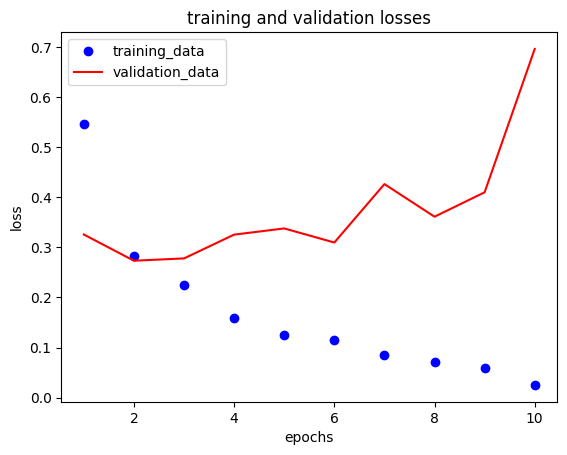

In [100]:
import matplotlib.pyplot as plt
loss_val=history_dict['loss']
val_loss_val=history_dict['val_loss']
epochs=range(1,len(history_dict['accuracy'])+1)
plt.plot(epochs,loss_val,'bo',label='training_data')
plt.plot(epochs,val_loss_val,'r',label='validation_data')
plt.title('training and validation losses')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

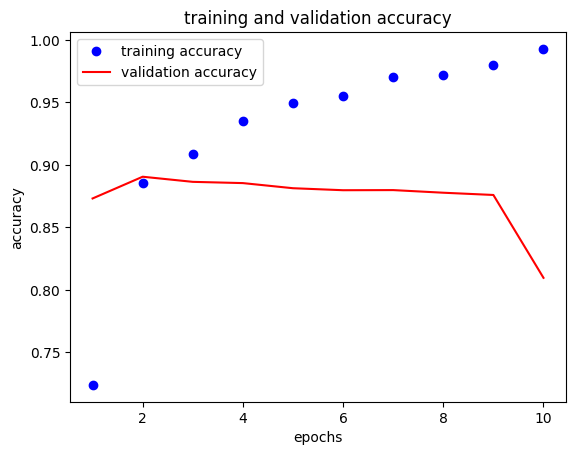

In [101]:
acc_val=history_dict['accuracy']
val_acc_val=history_dict['val_accuracy']
plt.plot(epochs,acc_val,'bo',label='training accuracy')
plt.plot(epochs,val_acc_val,'r',label='validation accuracy')
plt.title('training and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [102]:
model2=keras.models.Sequential([
    keras.layers.Dense(16,activation=activations.relu,input_shape=(10000,)),
    keras.layers.Dense(16,activation=activations.relu),
    keras.layers.Dense(1,activation=activations.sigmoid)
])
model2.compile(
    run_eagerly=True,
    optimizer=keras.optimizers.RMSprop(learning_rate=0.01),
    loss=losses.binary_crossentropy,
    metrics=['accuracy']
)
model2.fit(x_train,y_train,
                  epochs=10,
                  batch_size=512
                  )

Epoch 1/10
49/49 [==============================] - 3s 55ms/step - loss: 0.4893 - accuracy: 0.7711
Epoch 2/10
49/49 [==============================] - 2s 40ms/step - loss: 0.2696 - accuracy: 0.8947
Epoch 3/10
49/49 [==============================] - 2s 39ms/step - loss: 0.2103 - accuracy: 0.9155
Epoch 4/10
49/49 [==============================] - 2s 41ms/step - loss: 0.1723 - accuracy: 0.9309
Epoch 5/10
49/49 [==============================] - 2s 41ms/step - loss: 0.1487 - accuracy: 0.9408
Epoch 6/10
49/49 [==============================] - 2s 39ms/step - loss: 0.1262 - accuracy: 0.9485
Epoch 7/10
49/49 [==============================] - 2s 42ms/step - loss: 0.1001 - accuracy: 0.9589
Epoch 8/10
49/49 [==============================] - 2s 39ms/step - loss: 0.0821 - accuracy: 0.9659
Epoch 9/10
49/49 [==============================] - 2s 39ms/step - loss: 0.0828 - accuracy: 0.9674
Epoch 10/10
49/49 [==============================] - 2s 39ms/step - loss: 0.0642 - accuracy: 0.9761


In [103]:
ans=model2.evaluate(x_test,y_test)

782/782 [==============================] - 10s 13ms/step - loss: 0.6560 - accuracy: 0.8661


In [104]:
y_pred=model2.predict(x_test)

782/782 [==============================] - 4s 5ms/step


##### Checking the prediction for a random test sample:

In [110]:
y_pred[6]

array([1.], dtype=float32)

In [111]:
y_test[6]


1.0

In [107]:
y_pred

array([[0.0030994 ],
       [1.        ],
       [0.896433  ],
       ...,
       [0.00427043],
       [0.00290873],
       [0.9421599 ]], dtype=float32)

In [114]:
y_test

array([0., 1., 1., ..., 0., 0., 0.], dtype=float32)

##### Converting *float* predicted values to **binary** using a *threshold* of 0.5:

In [117]:
y_pred_real=[]
for res in y_pred:
    if res<0.5:y_pred_real.append(0)
    else: y_pred_real.append(1)

In [122]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_pred_real,y_test)

##### CHECKING ACCURACY:

In [120]:
(11196+10456)/(11196+10456+2044+1304)

0.86608

In [123]:
import seaborn as sns

##### Visualizing the confusion matrix:

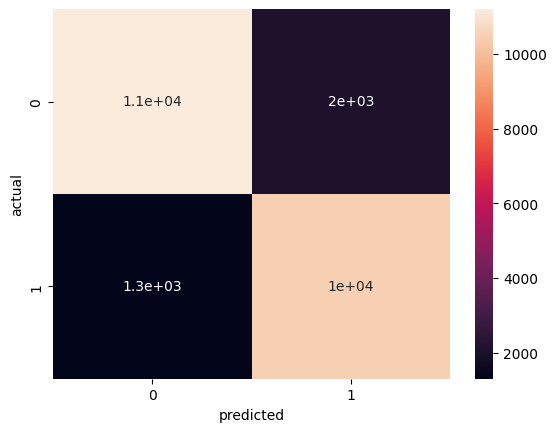

In [127]:
sns.heatmap(cf,annot=True)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

##### This was a Deep Learning project concerned with the Binary Classification of Movie Reviews on IMDB Dataset.
##### BY - **JATIN YADAV**
